### **신뢰구간**

서울시 기간별 시간평균 대기환경 정보 데이터셋을 이용해 신뢰구간을 구해보는 연습을 해보겠습니다.

<img src='https://user-images.githubusercontent.com/6457691/89852263-740add80-dbc9-11ea-9e6b-8059b3f7e479.png'>

<https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do>

**20년 3월의 송파구** 데이터만 사용합니다.



### **1. 데이터 로드(Load)**

In [ ]:
# 필요한 Lib Import, 데이터셋 Load

import pandas as pd
from google.colab import files
import io
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


data = files.upload()

Saving 서울시_기간별_시간평균_대기환경_정보_2020.03 (1).csv to 서울시_기간별_시간평균_대기환경_정보_2020.03 (1).csv


In [ ]:
data = pd.read_csv(io.BytesIO(data['서울시_기간별_시간평균_대기환경_정보_2020.03 (1).csv']))
data

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,202003312300,100,도심권,111123,종로구,47,48,22,0.036,0.018,0.4,0.004
1,202003312300,100,도심권,111131,용산구,55,52,21,0.024,0.033,0.5,0.003
2,202003312300,100,도심권,111121,중구,43,43,24,0.034,0.020,0.4,0.003
3,202003312300,101,서북권,111181,은평구,51,54,18,0.047,0.010,0.3,0.003
4,202003312300,101,서북권,111191,서대문구,58,57,21,0.047,0.012,0.6,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...
18595,202003010000,103,서남권,111231,영등포구,33,29,23,0.002,0.050,0.8,0.003
18596,202003010000,104,동남권,111261,강남구,26,25,19,0.008,0.046,0.7,0.002
18597,202003010000,104,동남권,111262,서초구,46,35,27,0.007,0.054,0.5,0.003
18598,202003010000,104,동남권,111274,강동구,36,31,22,0.002,0.043,0.6,0.002


In [ ]:
# 송파구 데이터셋만 이용할 예정이므로, 조건을 걸어 필터링해줍니다.
data_samp = data[data['측정소명']=='송파구']

data_samp

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
24,202003312300,104,동남권,111273,송파구,49,47,23,0.020,0.044,0.5,0.004
49,202003312200,104,동남권,111273,송파구,41,48,19,0.021,0.045,0.6,0.004
73,202003312100,104,동남권,111273,송파구,42,50,17,0.025,0.042,0.6,0.004
99,202003312000,104,동남권,111273,송파구,43,54,18,0.032,0.040,0.5,0.004
124,202003311900,104,동남권,111273,송파구,52,55,22,0.034,0.045,0.5,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...
18499,202003010400,104,동남권,111273,송파구,30,30,21,0.002,0.039,1.2,0.002
18524,202003010300,104,동남권,111273,송파구,31,30,20,0.002,0.040,1.2,0.002
18547,202003010200,104,동남권,111273,송파구,29,30,21,0.002,0.042,1.1,0.002
18573,202003010100,104,동남권,111273,송파구,30,30,20,0.002,0.042,1.1,0.002


### **2. 데이터셋으로 부터 2개의 샘플 생성**

- 신뢰구간 비교를 위해, 1개는 20개의 데이터, 다른 1개는 200개의 데이터로 셋을 형성합니다.
- 동일한 결과물을 위해 `42`를 처음에 한번 `random_state`로 설정합니다.

In [ ]:
# 2개의 샘플 데이터셋 생성
samp_small = data_samp.sample(n=20,random_state=42)
samp_large = data_samp.sample(n=200,random_state=42)

### **통계분석**

**1) 두 샘플데이터에 대해서 `오존(ppm)`항목의 표본 평균을 계산**

In [ ]:
# 두 샘플데이터에 대해 '오존(ppm)' 항목의 표본 평균 계산

so = samp_small['오존(ppm)'].mean()
sl = samp_large['오존(ppm)'].mean()

print('20개의 데이터 중 오존의 표본 평균: ',so)
print('200개의 데이터 중 오존의 표본 평균: ',sl)

20개의 데이터 중 오존의 표본 평균:  0.021750000000000002
200개의 데이터 중 오존의 표본 평균:  0.02291999999999995


**2) 모집단의 평균에 대한 추정 (95% 신뢰구간)**

In [ ]:
# 각 데이터셋에 대한 표준오차 산출

n1 = len(samp_small)
n2 = len(samp_large)

confidence = 0.95

stderr1 = stats.sem(samp_small['오존(ppm)']) 
stderr2 = stats.sem(samp_large['오존(ppm)'])

### **신뢰구간 산출**

In [ ]:
# 신뢰구간 함수 생성
def confidence_interval(data, confidence = 0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)

  stderr = stats.sem(data)

  interval = stderr * stats.t.ppf((1 + confidence) / 2, n-1)
  return (mean, mean - interval, mean + interval)

In [ ]:
# 각 샘플 데이터셋 별 신뢰구간 산출

print(confidence_interval(samp_small['오존(ppm)']))
print(confidence_interval(samp_large['오존(ppm)']))

(0.02175, 0.015060460813957321, 0.028439539186042674)
(0.02292, 0.02100651526262625, 0.02483348473737375)


In [ ]:
# 각 샘플에 대해 추정치에 대한 오차 산출
print('샘플 20개일 경우의 오차: ' ,stderr1, ', 샘플 200개일 경우의 오차: ' ,stderr2)

샘플 20개일 경우의 오차:  0.0031961119471863573 , 샘플 200개일 경우의 오차:  0.00097034832889895


In [ ]:
# 위 추정값 바탕으로, 95%에 해당하는 신뢰구간 산출

interval1 = stderr1 * stats.t.ppf( (1 + confidence) / 2 , n1 - 1)
interval2 = stderr2 * stats.t.ppf( (1 + confidence) / 2 , n2 - 1)

upper_1 = so + interval1
lower_1 = so - interval1
upper_2 = sl + interval2
lower_2 = sl - interval2

print('20개의 데이터 샘플로 확인한 결과, 모집단의 평균의 95% 신뢰 구간은 ',lower_1,'<= 모집단 평균 <=',upper_1)
print('200개의 데이터 샘플로 확인한 결과, 모집단의 평균의 95% 신뢰 구간은 ',lower_2,'<= 모집단 평균 <=',upper_2)

20개의 데이터 샘플로 확인한 결과, 모집단의 평균의 95% 신뢰 구간은  0.015060460813957325 <= 모집단 평균 <= 0.02843953918604268
200개의 데이터 샘플로 확인한 결과, 모집단의 평균의 95% 신뢰 구간은  0.021006515262626202 <= 모집단 평균 <= 0.0248334847373737


In [ ]:
# 두 샘플데이터셋에 대한 신뢰구간 비교
print(upper_1-lower_1)
print(upper_2-lower_2)

0.013379078372085356
0.0038269694747474978


**결론**

샘플이 **20개인 경우의 신뢰구간이 더 넓습니다.** 그 이유는, 샘플이 많으면 많을수록 정확도가 더 올라가기 때문에 구간이 좁아지기 때문입니다.

### **신뢰구간 시각화**

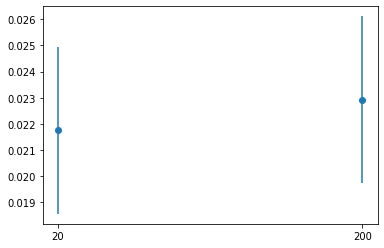

In [ ]:
# 에러바(error bar) 활용

x = ['20', '200']
y = [so, sl]

plt.errorbar(x, y, 
             yerr=[stderr1,stderr1], 
             fmt = 'o')

plt.show()

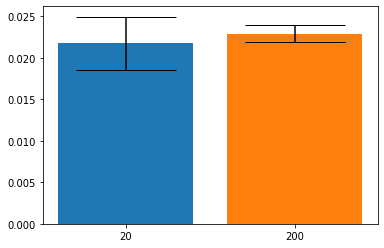

In [ ]:
# Plt.bar 활용

p1 = plt.bar('20', so, yerr=stderr1, capsize=50)
p2 = plt.bar('200', sl,yerr=stderr2, capsize=50)
plt.show()

In [ ]:
# 전체 데이터의 평균과, 추측된 평균값과 비교

sd = data['오존(ppm)'].mean()

print(' 실제 모평균 값은 ',sd,'이다. \n 샘플 20으로 추측한 모평균값의 95% 신뢰 구간은 ',lower_1,'<= 모집단 평균 <=',upper_1,'이다. \n 샘플 200으로 추측한 모평균값의 95% 신뢰 구간은 ',lower_2,'<= 모집단 평균 <=',upper_2,'이다. \n')
print(' 따라서 샘플 20으로 추측한 95% 신뢰 구간에 포함된다. ')

 실제 모평균 값은  0.02612661290322519 이다. 
 샘플 20으로 추측한 모평균값의 95% 신뢰 구간은  0.015060460813957325 <= 모집단 평균 <= 0.02843953918604268 이다. 
 샘플 200으로 추측한 모평균값의 95% 신뢰 구간은  0.021006515262626202 <= 모집단 평균 <= 0.0248334847373737 이다. 

 따라서 샘플 20으로 추측한 95% 신뢰 구간에 포함된다. 
